In [100]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
sns.set_theme(rc={"figure.figsize": (16, 9)})
sns.set_style("whitegrid")
#sns.set_context("paper")

tensorboard_colors = ['#FF7043', '#EC407A', '#29B6F6', '#9E9E9E', '#CDDC39']
sns.set_palette(tensorboard_colors)

In [102]:
folder = "logs/"
df = pd.DataFrame()

In [103]:
def exponential_moving_average(values, weight):
    ema = [values[0]] 
    for v in values[1:]:
        ema.append(ema[-1] * weight + (1 - weight) * v)
    return ema
weight = 0.6

In [104]:
for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        model, mode = os.path.splitext(filename)[0].split("_")
        model_df = pd.read_csv(f"{folder}{filename}")
        model_df["model"] = model
        model_df["mode"] = mode
        model_df['smoothed loss'] = exponential_moving_average(model_df['Value'], weight)
        model_df = model_df.rename(columns={"Step": "step"})

        df = pd.concat([df, model_df])

([<matplotlib.axis.XTick at 0x305836000>,
 [Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400'),
  Text(500, 0, '500'),
  Text(600, 0, '600'),
  Text(700, 0, '700'),
  Text(800, 0, '800'),
  Text(900, 0, '900'),
  Text(1000, 0, '1000'),
  Text(1100, 0, '1100')])

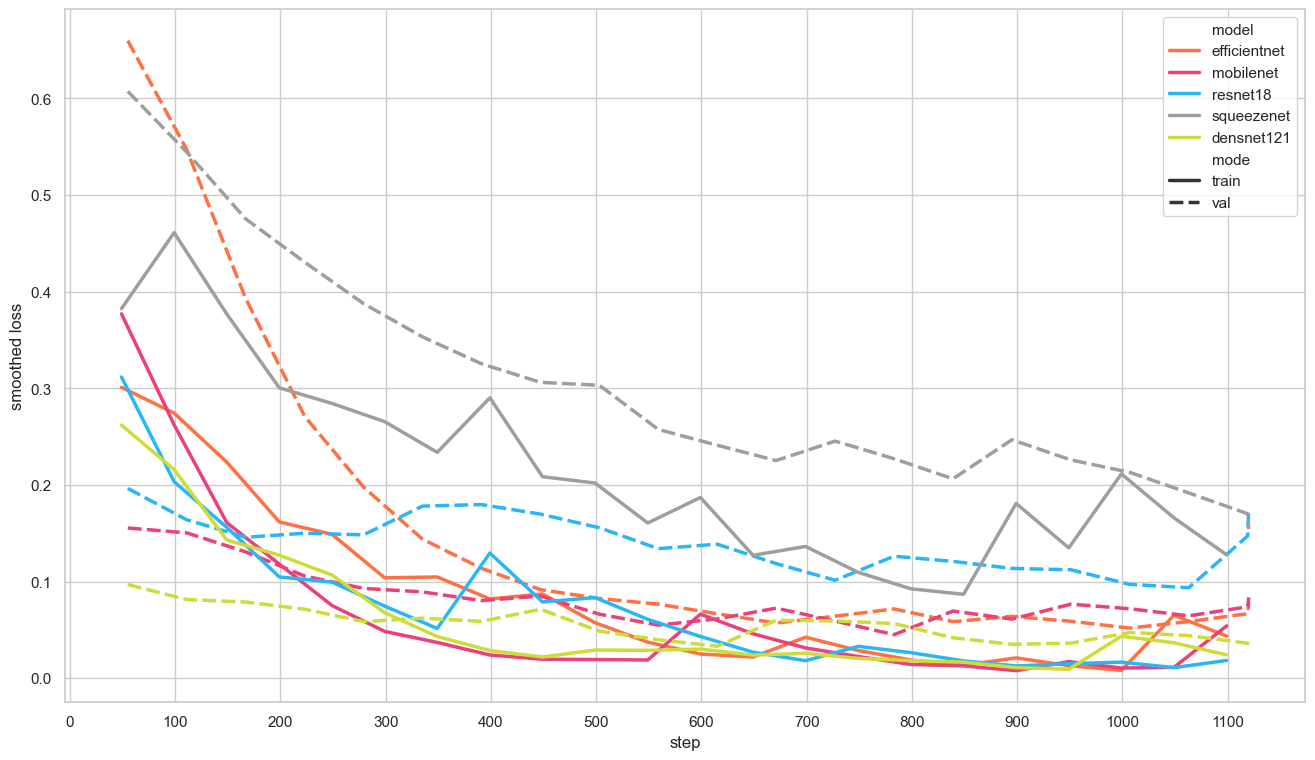

In [105]:
sns.lineplot(data=df, x="step", y="smoothed loss", hue="model", style="mode", linewidth=2.5)
plt.xticks(np.arange(0, df['step'].max()+1, 100)) 